In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

In [308]:
#(a)
size = 10000 #specify the num of rows
data = pd.read_csv("train.csv")
data_small = data.sample(size).copy()

In [309]:
data_small_clean = pd.get_dummies(data_small,columns = ["Product_Info_2"],drop_first=True)
data_small_clean = pd.get_dummies(data_small,columns = ["Product_Info_1", "Product_Info_2", "Product_Info_3",
                               "Product_Info_5", "Product_Info_6", "Product_Info_7",
                               "Employment_Info_2", "Employment_Info_3", "Employment_Info_5",
                               "InsuredInfo_1", "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4",
                               "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7", "Insurance_History_1",
                               "Insurance_History_2", "Insurance_History_3", "Insurance_History_4",
                               "Insurance_History_7", "Insurance_History_8", "Insurance_History_9",
                               "Family_Hist_1", "Medical_History_2", "Medical_History_3", "Medical_History_4",
                               "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",
                               "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13",
                               "Medical_History_14", "Medical_History_16", "Medical_History_17", "Medical_History_18",
                               "Medical_History_19", "Medical_History_20", "Medical_History_21", "Medical_History_22",
                               "Medical_History_23", "Medical_History_25", "Medical_History_26", "Medical_History_27",
                               "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",
                               "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36",
                               "Medical_History_37", "Medical_History_38", "Medical_History_39", "Medical_History_40",
                               "Medical_History_41"],drop_first=True)

In [310]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
data_imputed = imp.fit_transform(data_small_clean)
data_small_clean.columns
data_imputed_df = pd.DataFrame(data_imputed,columns=data_small_clean.columns)

In [312]:
data_small_clean

,Id,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,...,Medical_History_34_3,Medical_History_35_3,Medical_History_36_2,Medical_History_36_3,Medical_History_37_2,Medical_History_38_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3,Medical_History_41_3
47010,62562,1.000000,0.313433,0.563636,0.133891,0.307661,0.055000,0.000,0.15000,0.000667,...,1,0,0,1,1,0,1,0,1,0
18751,25013,0.128205,0.194030,0.600000,0.194561,0.401949,0.065000,0.000,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
36820,48901,0.230769,0.537313,0.654545,0.246862,0.447639,0.250000,0.000,1.00000,NaN,...,0,0,1,0,1,0,1,0,1,0
14935,19920,0.179487,0.507463,0.800000,0.414226,0.566707,0.042000,0.000,0.11000,0.001000,...,1,0,1,0,1,0,1,0,1,1
6343,8458,0.230769,0.537313,0.727273,0.309623,0.481494,0.055500,0.000,NaN,0.001667,...,1,0,1,0,1,0,1,0,1,0
7360,9811,1.000000,0.238806,0.636364,0.121339,0.224087,0.042000,NaN,0.00500,NaN,...,1,0,0,0,1,0,1,0,1,0
26604,35452,0.487179,0.119403,0.727273,0.341004,0.533838,0.080000,0.000,NaN,NaN,...,1,0,1,0,1,0,1,0,1,1
10538,14004,0.076923,0.686567,0.654545,0.246862,0.447639,0.000000,0.080,NaN,0.001333,...,1,0,1,0,1,0,0,0,1,0
34930,46397,0.128205,0.626866,0.800000,0.382845,0.519943,0.035000,NaN,0.10000,0.001000,...,1,0,1,0,1,0,1,0,1,1
53106,70708,0.487179,0.223881,0.600000,0.161088,0.332796,0.092000,0.000,0.50000,NaN,...,1,0,1,0,1,0,1,0,1,1


In [280]:
X = data_imputed_df.drop('Response',1)
y = data_imputed_df['Response']
X_shuffle = shuffle(X)
y_shuffle = y[X_shuffle.index]

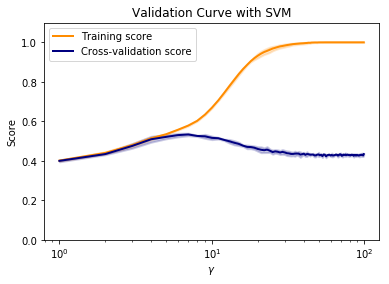

In [287]:
depth_range = range(1,100)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_shuffle, y_shuffle, "max_depth",depth_range,scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("$Max-Depth$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(depth_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(depth_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [289]:
maxScore = 0
maxDepth = None
for i in range(valid_scores.shape[0]):
    if np.mean(valid_scores[i])>maxScore:
        maxScore = np.mean(valid_scores[i])
        maxDepth = i+1

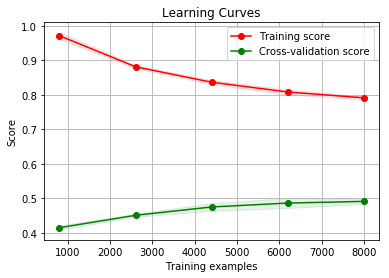

In [313]:
#plot learning curve
title = "Learning Curves"
plot_learning_curve(DecisionTreeClassifier(max_depth=maxDepth), title, X_shuffle, y_shuffle, cv=5)
plt.show()

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [315]:
param_range = range(1,100)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

KeyboardInterrupt: 

In [107]:
data_clean = pd.get_dummies(data,columns = ["Product_Info_1", "Product_Info_2", "Product_Info_3", 
                               "Product_Info_5", "Product_Info_6", "Product_Info_7", 
                               "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", 
                               "InsuredInfo_1", "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", 
                               "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7", "Insurance_History_1", 
                               "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", 
                               "Insurance_History_7", "Insurance_History_8", "Insurance_History_9", 
                               "Family_Hist_1", "Medical_History_2", "Medical_History_3", "Medical_History_4", 
                               "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",
                               "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", 
                               "Medical_History_14", "Medical_History_16", "Medical_History_17", "Medical_History_18", 
                               "Medical_History_19", "Medical_History_20", "Medical_History_21", "Medical_History_22", 
                               "Medical_History_23", "Medical_History_25", "Medical_History_26", "Medical_History_27", 
                               "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31", 
                               "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", 
                               "Medical_History_37", "Medical_History_38", "Medical_History_39", "Medical_History_40", 
                               "Medical_History_41"],drop_first=True)
data_clean

,Id,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,...,Medical_History_36_3,Medical_History_37_2,Medical_History_37_3,Medical_History_38_2,Medical_History_39_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3,Medical_History_41_2,Medical_History_41_3
0,2,0.076923,0.641791,0.581818,0.148536,0.323008,0.0280,0.00000,NaN,0.000667,...,0,1,0,0,0,1,0,1,0,1
1,5,0.076923,0.059701,0.600000,0.131799,0.272288,0.0000,0.00000,0.0018,0.000133,...,0,1,0,0,0,1,0,1,0,0
2,6,0.076923,0.029851,0.745455,0.288703,0.428780,0.0300,0.00000,0.0300,NaN,...,1,1,0,0,0,1,0,1,0,0
3,7,0.487179,0.164179,0.672727,0.205021,0.352438,0.0420,0.00000,0.2000,NaN,...,0,1,0,0,0,1,0,1,0,0
4,8,0.230769,0.417910,0.654545,0.234310,0.424046,0.0270,0.00000,0.0500,NaN,...,1,1,0,0,0,1,0,1,0,0
5,10,0.230769,0.507463,0.836364,0.299163,0.364887,0.3250,0.00000,1.0000,0.005000,...,0,1,0,0,0,1,0,1,0,1
6,11,0.166194,0.373134,0.581818,0.173640,0.376587,0.1100,NaN,0.8000,0.001667,...,0,1,0,0,0,1,0,1,0,1
7,14,0.076923,0.611940,0.781818,0.403766,0.571612,0.1200,0.00000,1.0000,0.000667,...,0,1,0,0,0,1,0,1,0,0
8,15,0.230769,0.522388,0.618182,0.184100,0.362643,0.1650,0.00000,1.0000,0.007613,...,0,1,0,0,0,1,0,1,0,1
9,16,0.076923,0.552239,0.600000,0.284519,0.587796,0.0250,0.00000,0.0500,0.000667,...,0,1,0,0,0,1,0,1,0,0


In [102]:
enc = OneHotEncoder.fit(data,categorical_features=[1])

TypeError: fit() got an unexpected keyword argument 'categorical_features'

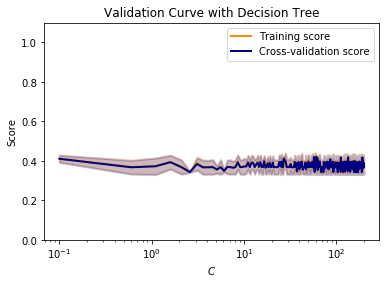

In [306]:
from sklearn.linear_model import LogisticRegression
crange = np.arange(1e-1,200,0.5)
train_scores, test_scores = validation_curve(LogisticRegression(), X_shuffle, y_shuffle, "C",crange,scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#plot validation curve
plt.title("Validation Curve with Decision Tree")
plt.xlabel("$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(crange, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(crange, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(crange, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(crange, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [298]:
y_shuffle.shape[0]

10000